# Forex Cluster

## Import all the crucial libraries

In [1]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from warnings import filterwarnings
import scipy as sp
from sklearn.cluster import KMeans
filterwarnings('ignore')


## Import the dataset


In [2]:
data = pd.read_excel ("HW_Data_Set.xlsx")
df= data.copy()
df = df.dropna()
df.head()

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,...,ind_416,ind_418,ind_420,ind_422,ind_424,ind_426,ind_428,20_target,50_target,90_target
0,19,17,100.0,85.714286,14.285714,72.363515,60.808814,23.80,17.62,11.73,...,-49.6,-54,-152,-353,1.0,0.498547,0.701906,15.135802,35.625252,36.997753
1,24,19,100.0,78.571429,21.428571,74.275883,64.366798,11.45,18.16,12.22,...,-55.6,-60,-158,-359,1.0,0.537088,0.690833,15.143348,35.643013,37.016198
2,30,24,100.0,71.428571,28.571429,75.140402,65.915803,8.75,17.86,12.28,...,-58.4,-60,-160,-362,1.0,0.615169,0.693040,15.146870,35.651301,-37.024805
3,37,30,100.0,64.285714,35.714286,76.677846,68.584234,7.80,14.76,12.61,...,-61.8,-65,-166,-367,1.0,0.661517,0.673418,15.153283,0.000000,-37.040483
4,41,37,100.0,57.142857,42.857143,81.603007,76.455495,14.90,11.92,14.25,...,-79.8,-86,-186,-388,1.0,0.747204,0.700522,-15.179065,-35.727079,-37.103503


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ind_5,6167.0,-0.803146,23.624403,-131.000000,-14.000000,0.000000,13.000000,76.000000
ind_6,6167.0,-0.803470,23.624144,-131.000000,-14.000000,0.000000,13.000000,76.000000
ind_8,6167.0,48.388890,36.388526,0.000000,14.285714,50.000000,85.714286,100.000000
ind_9,6167.0,48.289282,36.478009,0.000000,14.285714,50.000000,85.714286,100.000000
ind_10,6167.0,0.099609,60.414625,-100.000000,-50.000000,0.000000,57.142857,100.000000
...,...,...,...,...,...,...,...,...
ind_426,6167.0,0.498188,0.228547,0.000000,0.323783,0.495192,0.675730,1.000000
ind_428,6167.0,0.490174,0.150483,0.083530,0.379894,0.487078,0.601508,0.868534
20_target,6167.0,-0.057102,14.834497,-15.780588,-15.350354,0.000000,15.385945,15.768767
50_target,6167.0,-2.906358,34.559778,-37.142889,-36.208094,-34.267756,35.879524,37.038694


## Identifying categorical data

In [4]:
# kategorik değişkenleri görmek istedim
df_categorical = df.select_dtypes(include=['object'])
df_categorical.head()

,ind_109,ind_420,ind_422
0,GREEN,-152,-353
1,GREEN,-158,-359
2,GREEN,-160,-362
3,GREEN,-166,-367
4,GREEN,-186,-388


In [5]:
df_categorical = df.select_dtypes(include=['object'])
df_categorical.head()

for i in df_categorical:
    print(df_categorical[i].describe())  

count      6167
unique        2
top       GREEN
freq       3132
Name: ind_109, dtype: object
count     6167
unique     582
top          ?
freq      1041
Name: ind_420, dtype: object
count     6167
unique     573
top          ?
freq      1041
Name: ind_422, dtype: object


## Encoding the categorical data

In [103]:
df_encoded = pd.get_dummies(df, columns = ["ind_109"], prefix = ["new_"],drop_first=True)
df_encoded = df_encoded.drop(["ind_420","ind_422"],axis=1)
df_encoded.head()

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,...,ind_414,ind_416,ind_418,ind_424,ind_426,ind_428,20_target,50_target,90_target,new__RED
0,19,17,100.0,85.714286,14.285714,72.363515,60.808814,23.80,17.62,11.73,...,2.0,-49.6,-54,1.0,0.498547,0.701906,15.135802,35.625252,36.997753,0
1,24,19,100.0,78.571429,21.428571,74.275883,64.366798,11.45,18.16,12.22,...,0.8,-55.6,-60,1.0,0.537088,0.690833,15.143348,35.643013,37.016198,0
2,30,24,100.0,71.428571,28.571429,75.140402,65.915803,8.75,17.86,12.28,...,2.7,-58.4,-60,1.0,0.615169,0.693040,15.146870,35.651301,-37.024805,0
3,37,30,100.0,64.285714,35.714286,76.677846,68.584234,7.80,14.76,12.61,...,0.9,-61.8,-65,1.0,0.661517,0.673418,15.153283,0.000000,-37.040483,0
4,41,37,100.0,57.142857,42.857143,81.603007,76.455495,14.90,11.92,14.25,...,0.1,-79.8,-86,1.0,0.747204,0.700522,-15.179065,-35.727079,-37.103503,0


In [9]:
# kendi içlerinde korelasyon tablosuna baktık
df_encoded.corr().abs()

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,...,ind_414,ind_416,ind_418,ind_424,ind_426,ind_428,20_target,50_target,90_target,new__RED
ind_5,1.000000,0.989945,0.543246,0.533328,0.649225,0.822255,0.768234,0.014502,0.026336,0.041130,...,0.694619,0.304134,0.620099,0.076169,0.626439,0.817302,0.060969,0.068989,0.060428,0.105511
ind_6,0.989945,1.000000,0.514222,0.495572,0.608947,0.768551,0.713870,0.006066,0.019393,0.035795,...,0.646983,0.279922,0.569657,0.021220,0.567359,0.810371,0.062101,0.069652,0.061560,0.027591
ind_8,0.543246,0.514222,1.000000,0.374857,0.828650,0.583623,0.482220,0.162635,0.139612,0.038862,...,0.489596,0.277258,0.432579,0.144795,0.593799,0.445427,0.004126,0.006984,0.006650,0.177101
ind_9,0.533328,0.495572,0.374857,1.000000,0.829576,0.609288,0.568581,0.238938,0.240048,0.152133,...,0.436275,0.349318,0.505772,0.173139,0.631961,0.450719,0.031316,0.004053,0.012093,0.206484
ind_10,0.649225,0.608947,0.828650,0.829576,1.000000,0.719409,0.633753,0.046312,0.060849,0.068450,...,0.558311,0.377913,0.565931,0.191752,0.739227,0.540428,0.016423,0.006654,0.011307,0.231345
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ind_428,0.817302,0.810371,0.445427,0.450719,0.540428,0.807595,0.727899,0.021970,0.016318,0.010361,...,0.499656,0.260048,0.487564,0.188853,0.584754,1.000000,0.047041,0.052418,0.043563,0.175658
20_target,0.060969,0.062101,0.004126,0.031316,0.016423,0.042550,0.041289,0.015320,0.012012,0.026881,...,0.029005,0.009829,0.045656,0.008799,0.019599,0.047041,1.000000,0.384076,0.355950,0.030119
50_target,0.068989,0.069652,0.006984,0.004053,0.006654,0.055045,0.048302,0.072728,0.084561,0.101774,...,0.008239,0.047728,0.101488,0.003372,0.009063,0.052418,0.384076,1.000000,0.940916,0.018466
90_target,0.060428,0.061560,0.006650,0.012093,0.011307,0.043786,0.043491,0.077710,0.088271,0.108077,...,0.018379,0.049615,0.096903,0.007689,0.002519,0.043563,0.355950,0.940916,1.000000,0.019559


## Histogram Graphs of Variables

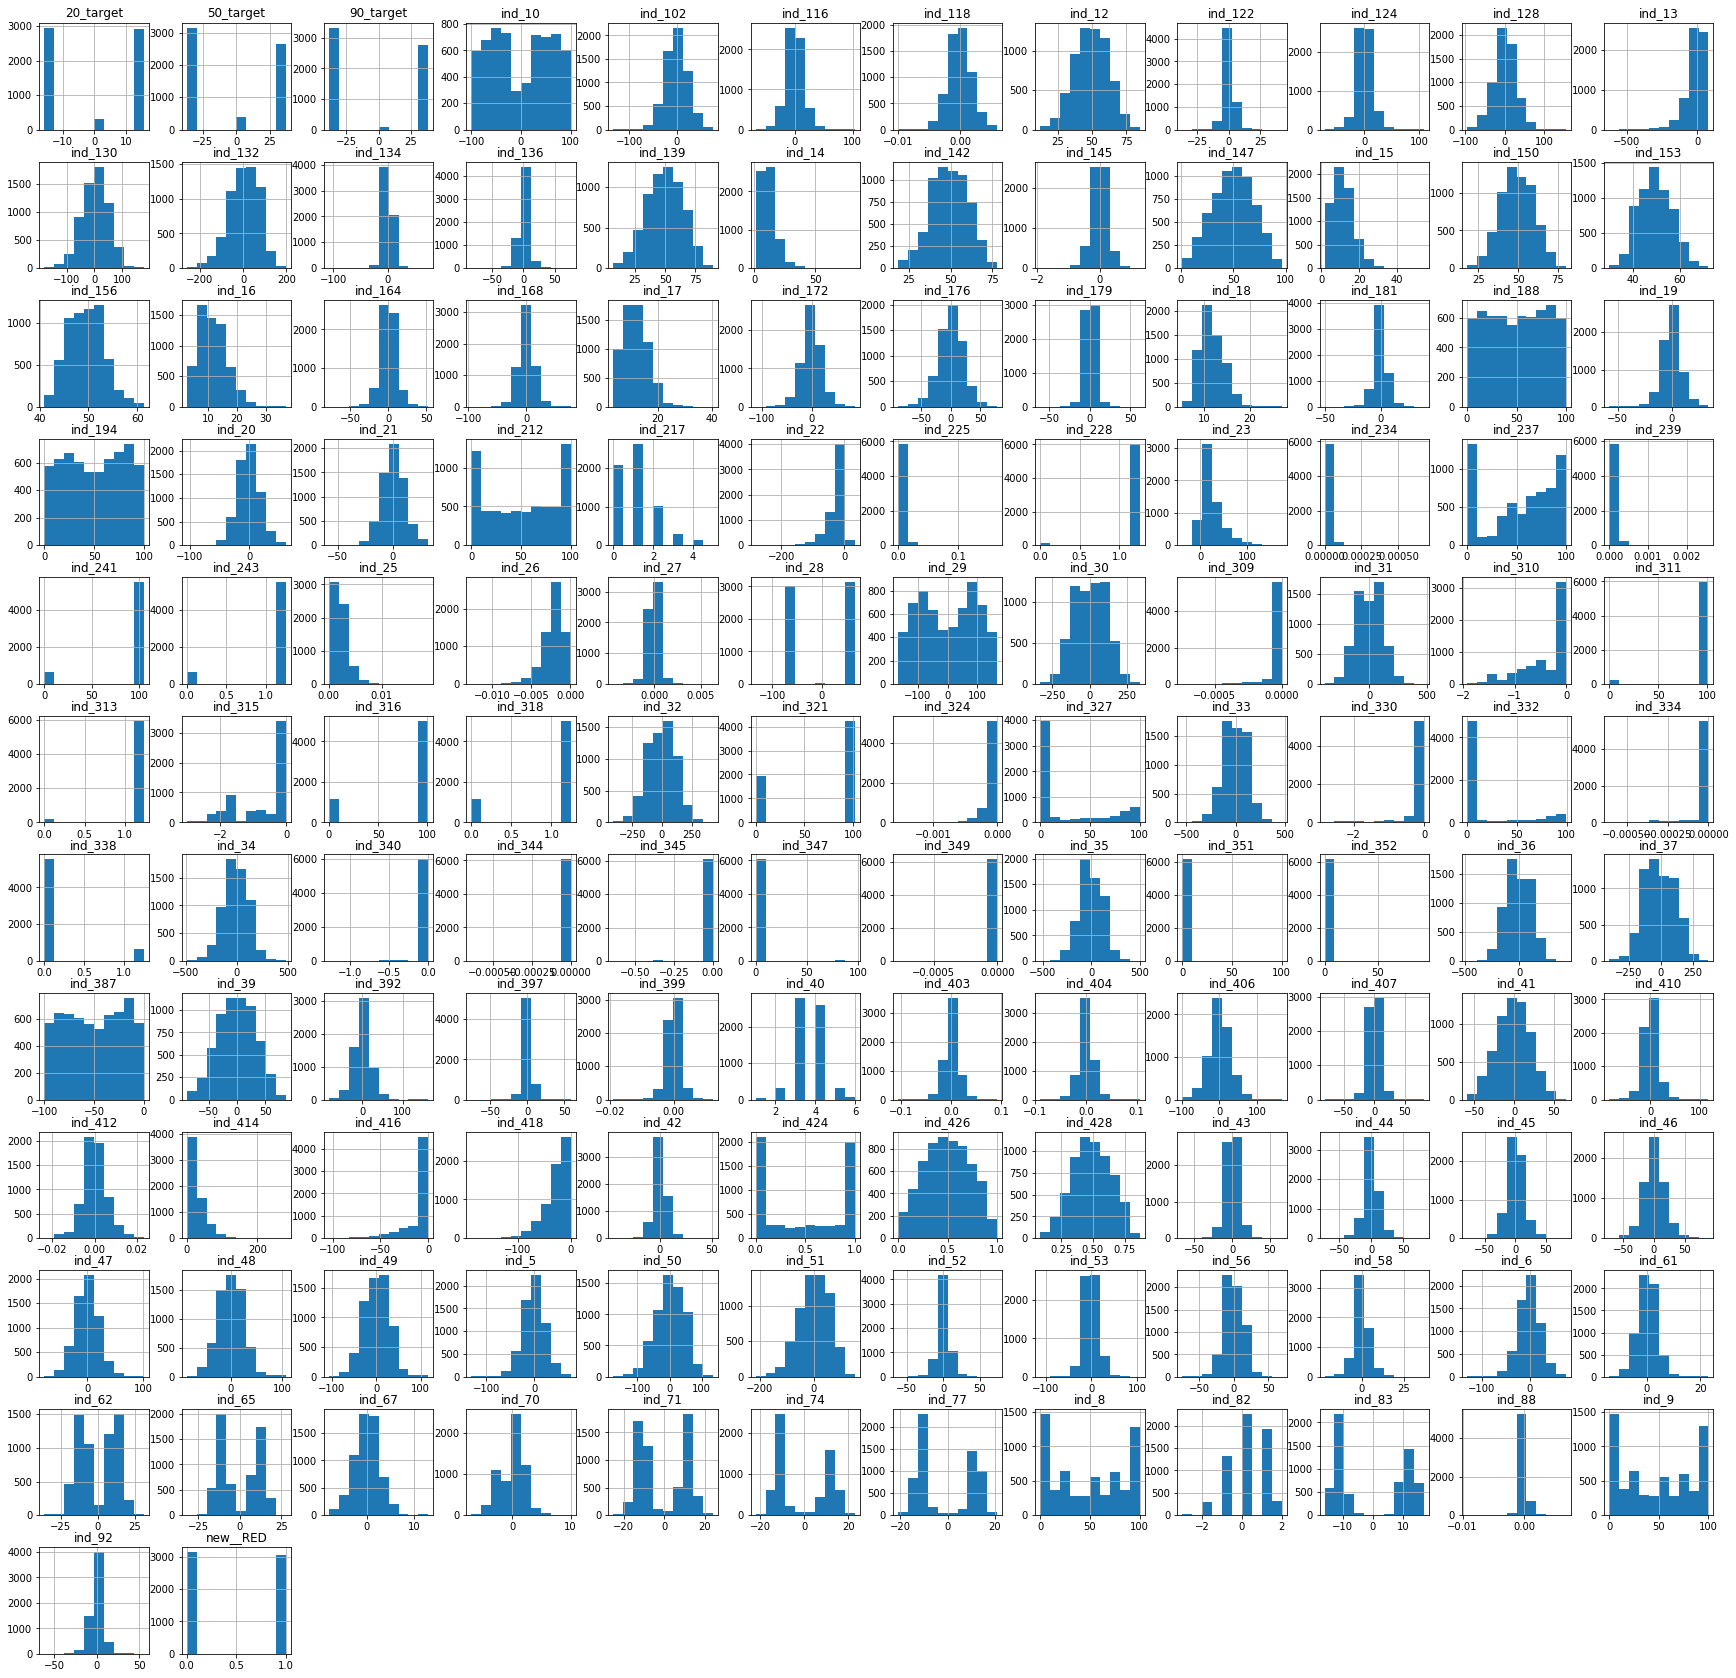

In [91]:
df_encoded.hist(figsize = (30,30));

## K-MEANS Model

In [112]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 4)
kmeans
# check after PCA


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [9]:
?kmeans

In [10]:
k_fit = kmeans.fit(df_encoded)

In [14]:
k_fit.n_clusters

4

In [109]:
k_fit.cluster_centers_


array([[-5.11583422e+00, -2.99468650e+00,  3.26704114e+01,
         7.15576135e+01, -3.88872021e+01,  4.26746275e+01,
        -3.84455826e+01,  1.20045696e+01,  1.16613390e+01,
         1.14037088e+01,  1.13453985e+01,  1.15061796e+01,
        -1.19872476e+00,  5.10095643e-02,  1.24654623e+00,
        -3.34729012e+01,  7.83103082e+00,  2.20699080e-03,
        -1.86236571e-03,  1.72307139e-04, -3.26602905e+01,
        -8.40315145e+01, -1.07336735e+02, -1.10314492e+02,
        -1.04539558e+02, -8.51977872e+01, -6.51191065e+01,
        -5.00566811e+01, -1.25181677e+01, -4.47685901e+00,
        -2.24104063e+01,  3.91604676e+00, -1.48546804e+01,
         2.52391073e+00,  5.60892667e+00,  9.05100956e+00,
         1.13761955e+01,  1.22699256e+01,  1.21519660e+01,
         1.10010627e+01,  9.99256111e+00,  3.36875664e+00,
        -7.71519660e-01,  5.67375133e+00, -1.16078640e+01,
        -1.06981934e+01,  2.80446334e+00,  1.54091392e+00,
        -8.27842721e+00, -6.89798087e+00,  6.06801275e-0

In [110]:
k_fit.labels_


array([5, 5, 5, ..., 6, 5, 5], dtype=int32)

## K-Mean Visualization 

In [17]:
kmeans = KMeans(n_clusters = 2)
k_fit = kmeans.fit(df_encoded)
# 2 cluster kurarak görsel hale getirdik

In [18]:
kumeler = k_fit.labels_

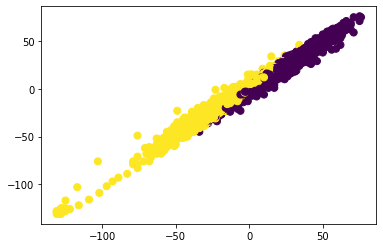

In [19]:
plt.scatter(df_encoded.iloc[:,0], df_encoded.iloc[:,1], c = kumeler, s = 50, cmap = "viridis")

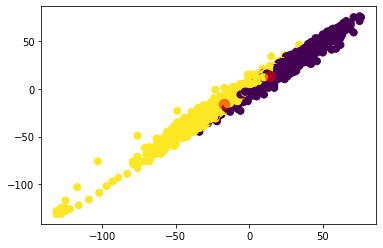

In [20]:
plt.scatter(df_encoded.iloc[:,0], df_encoded.iloc[:,1], c = kumeler, s = 50, cmap = "viridis")

merkezler = k_fit.cluster_centers_

plt.scatter(merkezler[:,0], merkezler[:,1], c = "red", s = 100, alpha = 0.5);
# burda da merkezleri işaretledik
# iki değişken seçilmiş durumda

In [20]:
from mpl_toolkits.mplot3d import Axes3D

In [111]:
kmeans = KMeans(n_clusters = 3)
k_fit = kmeans.fit(df_encoded)
kumeler = k_fit.labels_
merkezler = kmeans.cluster_centers_


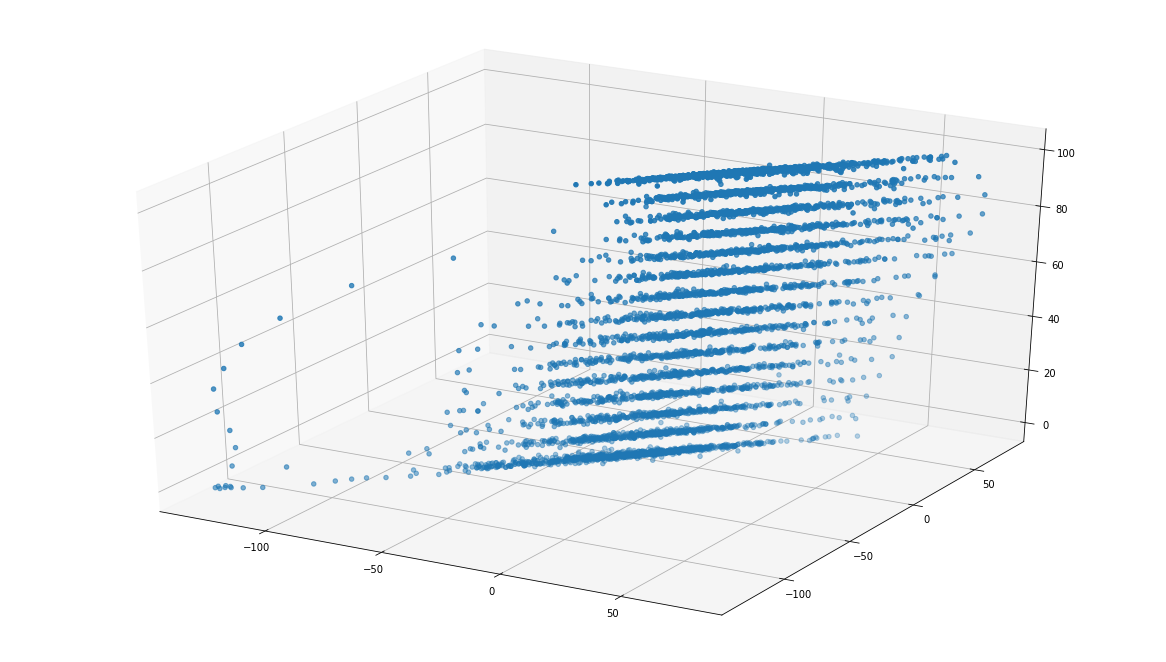

In [22]:
plt.rcParams['figure.figsize'] = (16, 9)
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(df_encoded.iloc[:, 0], df_encoded.iloc[:, 1], df_encoded.iloc[:, 2]);

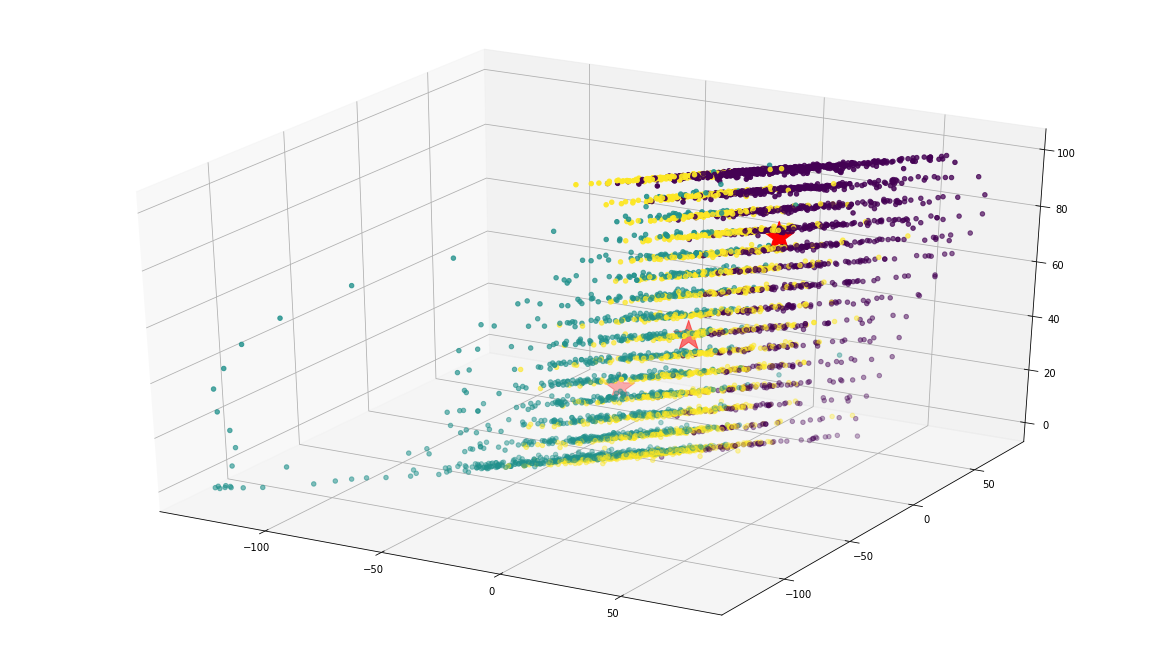

In [23]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(df_encoded.iloc[:, 0], df_encoded.iloc[:, 1], df_encoded.iloc[:, 2], c=kumeler)
ax.scatter(merkezler[:, 0], merkezler[:, 1], merkezler[:, 2], 
           marker='*', 
           c='red', 
           s=1000);


In [24]:
#kumeler ve gözlem birimleri
# hangi ID hangi kümenin içinde yer alacak görmek istiyoruz

In [25]:
kmeans = KMeans(n_clusters = 3)
k_fit = kmeans.fit(df_encoded)
kumeler = k_fit.labels_

In [26]:
pd.DataFrame({"ID" : df_encoded.index, "Kumeler": kumeler})[0:10]
# Check the clusters 

,ID,Kumeler
0,0,2
1,1,2
2,2,2
3,3,2
4,4,2
5,5,2
6,6,2
7,7,2
8,8,2
9,9,2


In [27]:
df_encoded["kume_no"] = kumeler


In [28]:
df_encoded.head()

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,...,ind_416,ind_418,ind_424,ind_426,ind_428,20_target,50_target,90_target,new__RED,kume_no
0,19,17,100.0,85.714286,14.285714,72.363515,60.808814,23.80,17.62,11.73,...,-49.6,-54,1.0,0.498547,0.701906,15.135802,35.625252,36.997753,0,2
1,24,19,100.0,78.571429,21.428571,74.275883,64.366798,11.45,18.16,12.22,...,-55.6,-60,1.0,0.537088,0.690833,15.143348,35.643013,37.016198,0,2
2,30,24,100.0,71.428571,28.571429,75.140402,65.915803,8.75,17.86,12.28,...,-58.4,-60,1.0,0.615169,0.693040,15.146870,35.651301,-37.024805,0,2
3,37,30,100.0,64.285714,35.714286,76.677846,68.584234,7.80,14.76,12.61,...,-61.8,-65,1.0,0.661517,0.673418,15.153283,0.000000,-37.040483,0,2
4,41,37,100.0,57.142857,42.857143,81.603007,76.455495,14.90,11.92,14.25,...,-79.8,-86,1.0,0.747204,0.700522,-15.179065,-35.727079,-37.103503,0,2


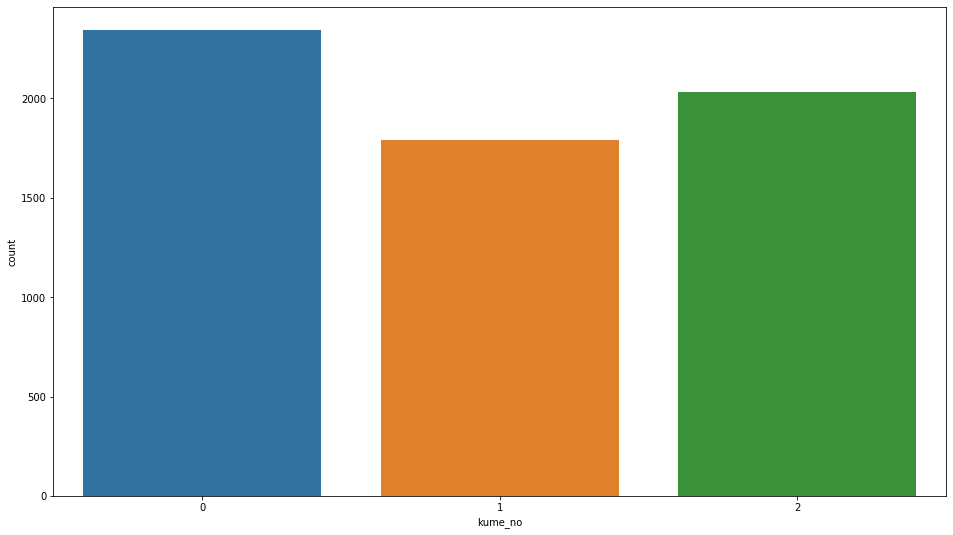

In [29]:
sns.countplot(df_encoded["kume_no"])

# Optimizaton of  Cluster Number 

## K-Elbow Visualizer

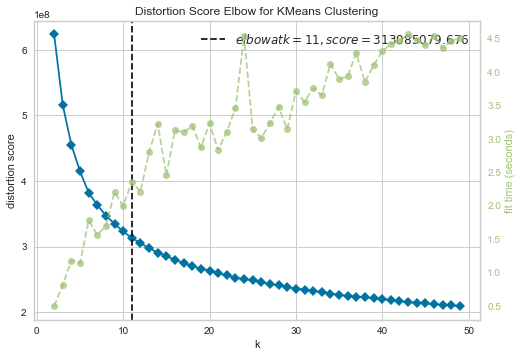

In [104]:
from yellowbrick.cluster import KElbowVisualizer
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2,50))
visualizer.fit(df_encoded) 
visualizer.poof()  
# optimal küme sayısının kaç olduğunu bulmaya çalışıyoruz
# amaç kendi içinde benzerlik oranı yüksek diğer küme ile benzerlik oranı düşük olacak
# burde Elbow yöntemini kullandık ama average siluete, gap statistic gibi diğer yöntemlerde var
# segmentayon yapmak için küme sayısı oluşturmak aslında iş bilgisi ile paraleldir.
# burdan kesişim noktasına göre kümeleme yapmak doğru sonuç vermeyebilir.

In [105]:
kmeans = KMeans(n_clusters = 7)
k_fit = kmeans.fit(df_encoded)
kumeler = k_fit.labels_
# grafiği yorumlarak  modelini kurduk

In [106]:
dff=pd.DataFrame({"ID" : df_encoded.index, "Kumeler": kumeler})

In [107]:
dff.head()

,ID,Kumeler
0,0,5
1,1,5
2,2,5
3,3,5
4,4,5


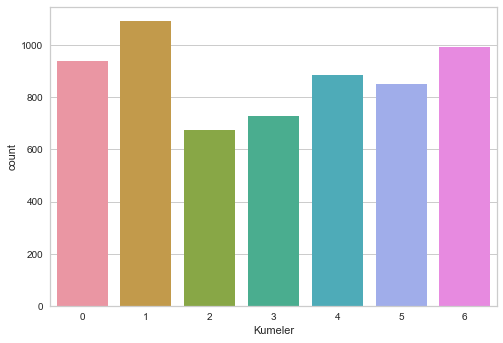

In [108]:
sns.countplot(dff["Kumeler"])

# PCA
     - Temel fikir, çok değişkenli verinin ana özelliklerini daha az sayıda değişken/bileşen ile temsil etmektir.
    - Diğer bir ifade ile: küçük miktarda bir bilgi kaybını göze alıp değişken boyunu azaltmaktır.
   

In [36]:
df_encoded = pd.get_dummies(df, columns = ["ind_109"], prefix = ["new_"],drop_first=True)
df_encoded = df_encoded.drop(["ind_420","ind_422"],axis=1)
df_encoded.head()

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,...,ind_414,ind_416,ind_418,ind_424,ind_426,ind_428,20_target,50_target,90_target,new__RED
0,19,17,100.0,85.714286,14.285714,72.363515,60.808814,23.80,17.62,11.73,...,2.0,-49.6,-54,1.0,0.498547,0.701906,15.135802,35.625252,36.997753,0
1,24,19,100.0,78.571429,21.428571,74.275883,64.366798,11.45,18.16,12.22,...,0.8,-55.6,-60,1.0,0.537088,0.690833,15.143348,35.643013,37.016198,0
2,30,24,100.0,71.428571,28.571429,75.140402,65.915803,8.75,17.86,12.28,...,2.7,-58.4,-60,1.0,0.615169,0.693040,15.146870,35.651301,-37.024805,0
3,37,30,100.0,64.285714,35.714286,76.677846,68.584234,7.80,14.76,12.61,...,0.9,-61.8,-65,1.0,0.661517,0.673418,15.153283,0.000000,-37.040483,0
4,41,37,100.0,57.142857,42.857143,81.603007,76.455495,14.90,11.92,14.25,...,0.1,-79.8,-86,1.0,0.747204,0.700522,-15.179065,-35.727079,-37.103503,0


In [42]:
# PCA uygulamadan önce standardizasyon yaptım
from sklearn.preprocessing import StandardScaler
df_scl= StandardScaler().fit_transform(df_encoded)
df_scl[0:5,0:5]

array([[0.83831756, 0.75367444, 1.41844972, 1.0260439 , 0.23483149],
       [1.04998029, 0.83834045, 1.41844972, 0.83021533, 0.35307167],
       [1.30397556, 1.05000549, 1.41844972, 0.63438676, 0.47131185],
       [1.60030338, 1.30400354, 1.41844972, 0.43855819, 0.58955204],
       [1.76963356, 1.60033459, 1.41844972, 0.24272962, 0.70779222]])

In [11]:
columns = []

for c in df_encoded.columns:
    columns.append(c)
    
print(columns)

['ind_5', 'ind_6', 'ind_8', 'ind_9', 'ind_10', 'ind_12', 'ind_13', 'ind_14', 'ind_15', 'ind_16', 'ind_17', 'ind_18', 'ind_19', 'ind_20', 'ind_21', 'ind_22', 'ind_23', 'ind_25', 'ind_26', 'ind_27', 'ind_28', 'ind_29', 'ind_30', 'ind_31', 'ind_32', 'ind_33', 'ind_34', 'ind_35', 'ind_36', 'ind_37', 'ind_39', 'ind_40', 'ind_41', 'ind_42', 'ind_43', 'ind_44', 'ind_45', 'ind_46', 'ind_47', 'ind_48', 'ind_49', 'ind_50', 'ind_51', 'ind_52', 'ind_53', 'ind_56', 'ind_58', 'ind_61', 'ind_62', 'ind_65', 'ind_67', 'ind_70', 'ind_71', 'ind_74', 'ind_77', 'ind_82', 'ind_83', 'ind_88', 'ind_92', 'ind_102', 'ind_116', 'ind_118', 'ind_122', 'ind_124', 'ind_128', 'ind_130', 'ind_132', 'ind_134', 'ind_136', 'ind_139', 'ind_142', 'ind_145', 'ind_147', 'ind_150', 'ind_153', 'ind_156', 'ind_164', 'ind_168', 'ind_172', 'ind_176', 'ind_179', 'ind_181', 'ind_188', 'ind_194', 'ind_212', 'ind_217', 'ind_225', 'ind_228', 'ind_234', 'ind_237', 'ind_239', 'ind_241', 'ind_243', 'ind_309', 'ind_310', 'ind_311', 'ind_3

In [12]:
# veri setimizin standardizasyon yapılmış hali
df_scaled = pd.DataFrame(data= df_scl, columns=columns)
df_scaled

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,...,ind_414,ind_416,ind_418,ind_424,ind_426,ind_428,20_target,50_target,90_target,new__RED
0,0.838318,0.753674,1.418450,1.026044,0.234831,1.875320,1.161562,1.768003,1.010514,-0.008731,...,-1.008149,-2.549585,-1.110172,1.198341,0.001568,1.407132,1.024243,1.115017,1.094311,-0.984393
1,1.049980,0.838340,1.418450,0.830215,0.353072,2.032100,1.213674,-0.047253,1.103849,0.089859,...,-1.053751,-2.922284,-1.368019,1.198341,0.170218,1.333540,1.024752,1.115531,1.094811,-0.984393
2,1.303976,1.050005,1.418450,0.634387,0.471312,2.102976,1.236362,-0.444111,1.051996,0.101931,...,-0.981548,-3.096210,-1.368019,1.198341,0.511884,1.348207,1.024990,1.115771,-0.915067,-0.984393
3,1.600303,1.304004,1.418450,0.438558,0.589552,2.229019,1.275445,-0.583746,0.516185,0.168328,...,-1.049951,-3.307406,-1.582891,1.198341,0.714696,1.217802,1.025422,0.084103,-0.915492,-0.984393
4,1.769634,1.600335,1.418450,0.242730,0.707792,2.632796,1.390732,0.459843,0.025313,0.498302,...,-1.080352,-4.425503,-2.485355,1.198341,1.089645,1.397934,-1.019461,-0.949757,-0.917203,-0.984393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6162,1.176978,1.346337,0.240589,-0.540585,0.471312,0.862592,0.744924,-0.304476,-0.413707,0.379592,...,-0.525530,-1.220292,-0.508530,-0.517294,1.495705,0.735506,0.993060,-0.915305,-0.883640,1.015855
6163,0.965315,1.177005,0.044279,-0.736413,0.471312,0.878945,0.753009,-0.605794,-0.507042,0.003342,...,-0.540731,-1.245138,-0.551504,-1.152714,1.047054,0.249213,0.993094,-0.915339,-0.883673,1.015855
6164,0.838318,0.965339,-0.152031,-0.932242,0.471312,1.216681,0.908789,-0.414714,-0.469016,-0.296451,...,-0.867544,-1.779340,-0.895300,0.655790,0.586004,0.409284,-0.986124,-0.916076,-0.884391,-0.984393
6165,0.838318,0.838340,1.418450,-1.128070,1.535474,1.601847,1.063752,0.261414,-0.244321,-0.246151,...,-1.030950,-2.506103,-1.410993,1.198341,1.027536,0.673952,-0.987116,-0.917078,-0.885367,-0.984393


In [43]:
# scale edilmiş veri setine PCA uyguladım
from sklearn.decomposition import PCA
pca= PCA().fit(df_scl)


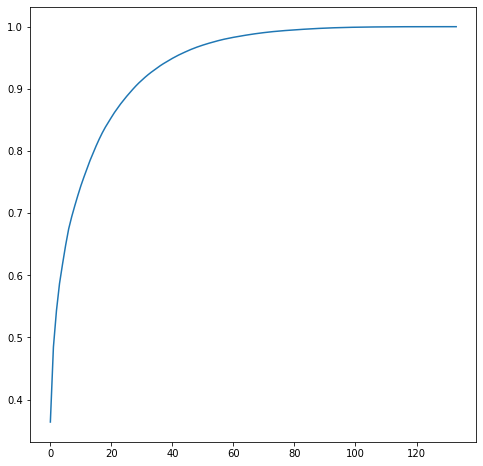

In [45]:
f, ax = plt.subplots(figsize = (8,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
# bileşen sayısına karar verme adına grafik çizdirdim
# Veri setinin % 90'ını 30 tane bileşenle açıklayabiliyorum.

In [46]:
# burda da pca component sayısı bulmak için fonk
def pca_fon(X, threshold):
    pca = PCA()
    X_pca = pca.fit_transform(scale(X))
    arr = np.cumsum(np.round(pca.explained_variance_ratio_, decimals = 4)*100)
    num_var = sum((arr < threshold*100)) + 1 
    print('pca sonrası değişken sayısı: ',num_var)
    X_pcad = pd.DataFrame(X_pca[:,0:num_var], index = X.index)
    return X_pcad

pca_fon(df_scaled, 0.9)

pca sonrası değişken sayısı:  29


,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,-11.789538,-3.237479,6.603439,-1.343513,0.566798,-1.017865,-1.818631,-0.783898,-1.550897,-1.104920,...,4.707530,0.257058,2.572428,-0.992794,-1.660411,1.476914,-0.364785,0.087347,0.575428,0.530642
1,-12.855855,-2.816394,5.122215,-0.538499,1.478853,-1.531793,-1.796723,-0.887668,-1.738607,-0.388380,...,4.778195,0.531626,2.564352,-1.124209,-1.636242,1.698806,-0.297013,0.186076,0.239436,1.022248
2,-12.914539,-1.236204,3.571677,0.267079,1.924383,-1.455350,-1.020038,-1.138542,-0.536080,0.353004,...,4.505197,-0.212444,2.069676,-1.441863,-1.365332,1.935472,-0.515782,0.703781,-0.187492,1.026410
3,-13.312348,-0.246636,2.588027,0.411526,1.636929,-0.329694,1.257558,-1.514301,0.234422,1.237146,...,4.218660,-0.868310,1.770752,-1.770660,-1.280999,2.134421,-0.696351,0.906358,-0.309893,1.057551
4,-17.128224,-3.414674,4.606612,0.088645,0.148057,1.150915,2.399246,-1.405463,1.160348,1.212614,...,4.575492,-2.400755,1.451133,-1.758261,-0.570513,2.304301,-0.923734,-0.913316,-0.595315,2.574554
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6162,-6.158824,7.316086,0.010731,1.425580,3.004996,4.103482,-0.490124,0.233308,0.988838,-0.547981,...,0.583215,-0.160694,2.362362,-0.459429,0.279266,-2.384301,-0.643578,-0.191056,1.805375,0.256621
6163,-5.654465,6.803611,0.792382,0.357523,2.344868,4.934979,0.439259,0.103168,0.864246,-0.418015,...,0.871451,0.985600,2.664273,-0.481512,0.503086,-2.035503,-0.331893,-0.118171,1.622170,0.277826
6164,-8.363660,2.640899,3.024051,-1.069824,1.643328,5.894395,1.479438,0.084547,1.981522,-0.601907,...,0.036461,0.292830,2.800210,-0.159813,1.186162,-0.680613,-0.674596,-0.933701,1.649792,1.093678
6165,-11.596166,0.137560,4.952179,-1.157651,4.166145,7.764186,0.084531,1.225111,3.272850,-2.790737,...,-0.287663,0.574609,2.456070,0.563512,1.204722,-1.357769,-0.128581,-1.010522,1.849345,1.553296


In [16]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals = 4)*100)

array([36.38, 48.44, 54.32, 58.67, 61.83, 64.82, 67.46, 69.43, 71.17,
       72.83, 74.4 , 75.8 , 77.15, 78.47, 79.66, 80.82, 81.9 , 82.9 ,
       83.81, 84.63, 85.42, 86.19, 86.88, 87.56, 88.18, 88.79, 89.36,
       89.92, 90.46, 90.96, 91.42, 91.86, 92.27, 92.66, 93.02, 93.38,
       93.73, 94.05, 94.35, 94.64, 94.92, 95.18, 95.44, 95.68, 95.9 ,
       96.12, 96.33, 96.53, 96.72, 96.89, 97.05, 97.2 , 97.35, 97.49,
       97.63, 97.76, 97.88, 98.  , 98.11, 98.21, 98.3 , 98.39, 98.48,
       98.56, 98.64, 98.72, 98.79, 98.86, 98.93, 98.99, 99.05, 99.11,
       99.16, 99.21, 99.26, 99.3 , 99.34, 99.38, 99.42, 99.46, 99.49,
       99.52, 99.55, 99.58, 99.61, 99.64, 99.67, 99.7 , 99.72, 99.74,
       99.76, 99.78, 99.8 , 99.82, 99.84, 99.85, 99.86, 99.87, 99.88,
       99.89, 99.9 , 99.91, 99.92, 99.93, 99.94, 99.95, 99.96, 99.97,
       99.97, 99.97, 99.97, 99.97, 99.97, 99.97, 99.97, 99.97, 99.97,
       99.97, 99.97, 99.97, 99.97, 99.97, 99.97, 99.97, 99.97, 99.97,
       99.97, 99.97,

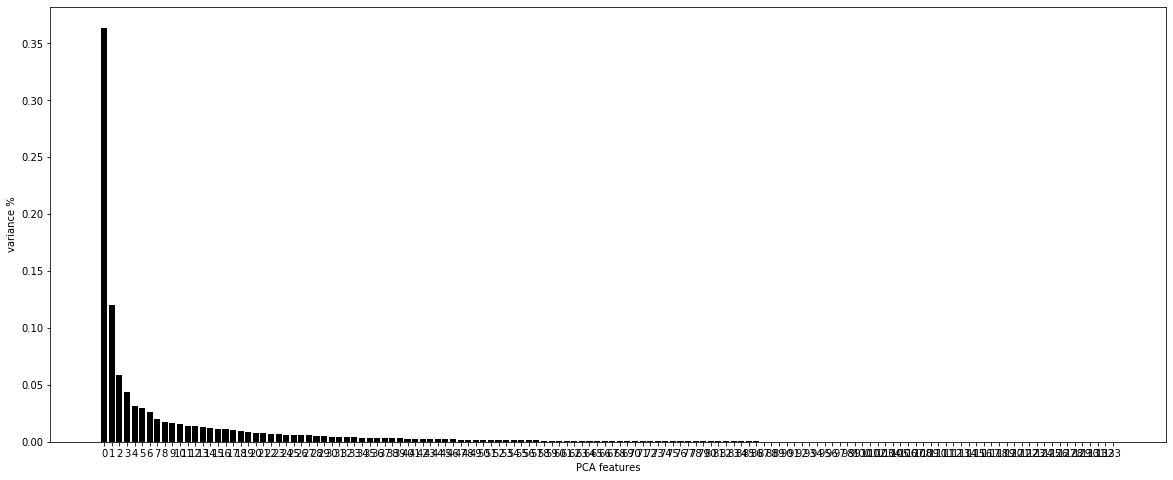

In [27]:
import matplotlib.pyplot as plt
features = range(pca.n_components_)
f, ax = plt.subplots(figsize = (20,8))
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features);

In [69]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 29)
pca_fit = pca.fit_transform(df_scaled)

In [54]:
pca_fit

array([[-11.78953775,  -3.23747837,   6.60344349, ...,   0.1225728 ,
          0.59809777,   0.57978636],
       [-12.85585487,  -2.81639378,   5.12222067, ...,   0.18773638,
          0.25050395,   1.05720204],
       [-12.9145385 ,  -1.23620361,   3.57168227, ...,   0.69450602,
         -0.16978494,   1.05231403],
       ...,
       [ -8.36365969,   2.64089847,   3.02404997, ...,  -0.74605266,
          1.61000739,   1.07072561],
       [-11.5961662 ,   0.1375596 ,   4.95217367, ...,  -0.74597268,
          1.72741509,   1.49966481],
       [ -9.82056166,   2.57587279,   3.06024962, ...,  -0.19443404,
          2.39257543,   1.06101541]])

In [70]:
df_pca = pd.DataFrame(data = pca_fit, 
                          columns =list(range(0,29)) )

In [71]:
df_pca.head()


,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,-11.789538,-3.237479,6.603444,-1.343515,0.566723,-1.017783,-1.818810,-0.784462,-1.551577,-1.105160,...,4.711131,0.258605,2.603862,-1.203490,-1.547589,1.457938,-0.369116,0.039053,0.559570,0.689261
1,-12.855855,-2.816394,5.122222,-0.538508,1.478756,-1.531692,-1.796871,-0.888580,-1.739480,-0.388529,...,4.780393,0.524516,2.601288,-1.366844,-1.489012,1.667082,-0.303467,0.095865,0.216197,1.176423
2,-12.914538,-1.236204,3.571686,0.267068,1.924291,-1.455252,-1.020142,-1.139507,-0.537050,0.353121,...,4.503852,-0.226625,2.103347,-1.679611,-1.165418,1.879293,-0.528053,0.573782,-0.220523,1.147704
3,-13.312348,-0.246636,2.588035,0.411518,1.636848,-0.329613,1.257468,-1.515106,0.233502,1.237303,...,4.219863,-0.882174,1.802243,-1.995496,-1.042852,2.075909,-0.706935,0.783512,-0.348474,1.155207
4,-17.128224,-3.414674,4.606617,0.088647,0.148005,1.150957,2.399149,-1.405743,1.159762,1.212555,...,4.591864,-2.402426,1.477704,-1.850937,-0.366241,2.300113,-0.877017,-0.931453,-0.585978,2.702459


In [72]:
pca.explained_variance_ratio_
# burda açıklanan varyans oranını görüyorsun

array([0.36378379, 0.12058889, 0.05881935, 0.04347718, 0.03161391,
       0.02987454, 0.02643403, 0.0197099 , 0.01743312, 0.01660668,
       0.01565258, 0.01403905, 0.01347469, 0.01317831, 0.01189528,
       0.01156679, 0.01084895, 0.01000452, 0.00906028, 0.00816709,
       0.00785412, 0.0077418 , 0.00689195, 0.00684206, 0.00623948,
       0.00603497, 0.00568216, 0.00555431, 0.00534322])

In [113]:
np.cumsum(pca.explained_variance_ratio_)
# kümülatif varyans oranı

array([0.36378379, 0.48437268, 0.54319203, 0.58666921, 0.61828312,
       0.64815766, 0.67459169, 0.69430159, 0.71173471, 0.72834139,
       0.74399398, 0.75803303, 0.77150773, 0.78468604, 0.79658132,
       0.80814812, 0.81899706, 0.82900159, 0.83806187, 0.84622895,
       0.85408307, 0.86182487, 0.86871682, 0.87555888, 0.88179835,
       0.88783333, 0.89351548, 0.89906979, 0.90441301])

In [73]:
data_pca = PCA().fit(df_pca)
# burda bileşen sayısı belirtmeden PCA modeli kurdum

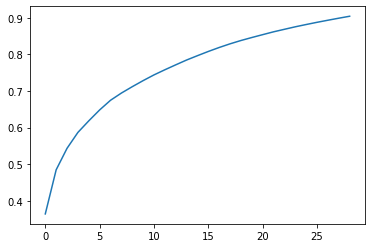

In [74]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
# bileşen sayısına karar verme adına grafik çizdirdim

#  K-Means Models After PCA

In [75]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 4)
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [76]:
k_fit = kmeans.fit(df_pca)

In [77]:
k_fit.cluster_centers_

array([[ 1.59771030e+00, -3.00311599e+00, -7.51929561e-01,
        -3.65746606e-01,  5.29619481e-01,  5.81712743e-02,
         3.06312223e-01, -2.61775814e-02, -1.41152029e-01,
        -1.00979495e-01, -1.43781664e-01,  1.74066706e-01,
        -1.26195705e-01, -1.21666362e-01, -1.73745553e-01,
        -2.01316902e-01, -2.11017660e-01,  2.59396502e-01,
        -5.64802887e-02, -6.62715567e-02,  5.54925530e-02,
        -1.22113040e-01,  4.05254301e-02, -1.09835670e-01,
         8.97217600e-03, -1.43469152e-01,  2.11158179e-01,
         1.66628474e-01,  1.16136836e-01],
       [-2.46101229e+00,  3.24517217e+00, -3.68744586e-01,
        -1.03440802e+00, -1.49998041e-01, -2.06860743e-01,
        -3.05914190e-01, -1.32977334e-01,  6.94817263e-02,
         5.34491332e-03,  3.66882290e-01,  1.86506904e-01,
        -1.21042885e-01,  2.76597880e-01,  1.82709817e-01,
         3.32626485e-01,  1.85192523e-01, -1.83662905e-01,
         7.31528976e-02, -2.64332630e-02,  3.31742558e-03,
         1.08

In [78]:
k_fit.labels_

array([2, 2, 2, ..., 2, 2, 2], dtype=int32)

## K-Mean Models Visualization After PCA

In [81]:
kumeler = k_fit.labels_
k_fit.cluster_centers_

array([[ 1.59771030e+00, -3.00311599e+00, -7.51929561e-01,
        -3.65746606e-01,  5.29619481e-01,  5.81712743e-02,
         3.06312223e-01, -2.61775814e-02, -1.41152029e-01,
        -1.00979495e-01, -1.43781664e-01,  1.74066706e-01,
        -1.26195705e-01, -1.21666362e-01, -1.73745553e-01,
        -2.01316902e-01, -2.11017660e-01,  2.59396502e-01,
        -5.64802887e-02, -6.62715567e-02,  5.54925530e-02,
        -1.22113040e-01,  4.05254301e-02, -1.09835670e-01,
         8.97217600e-03, -1.43469152e-01,  2.11158179e-01,
         1.66628474e-01,  1.16136836e-01],
       [-2.46101229e+00,  3.24517217e+00, -3.68744586e-01,
        -1.03440802e+00, -1.49998041e-01, -2.06860743e-01,
        -3.05914190e-01, -1.32977334e-01,  6.94817263e-02,
         5.34491332e-03,  3.66882290e-01,  1.86506904e-01,
        -1.21042885e-01,  2.76597880e-01,  1.82709817e-01,
         3.32626485e-01,  1.85192523e-01, -1.83662905e-01,
         7.31528976e-02, -2.64332630e-02,  3.31742558e-03,
         1.08

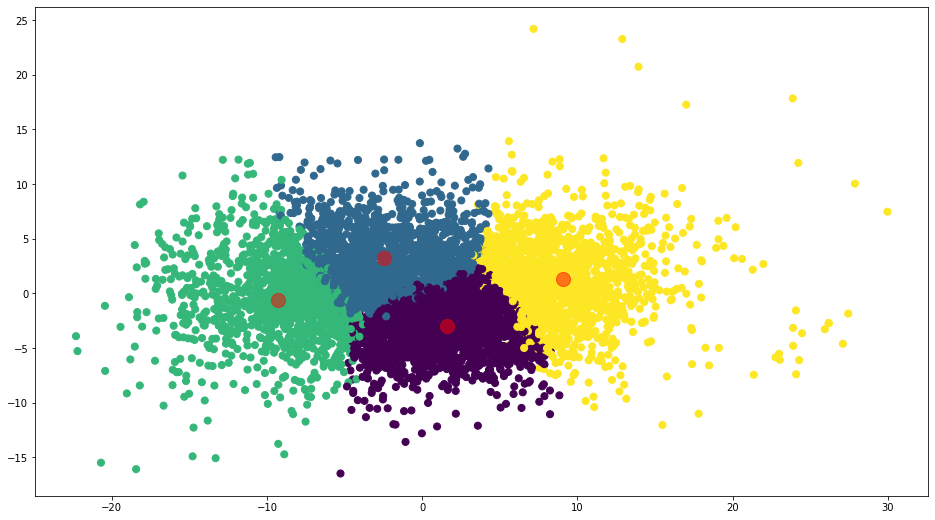

In [89]:
plt.scatter(df_pca.iloc[:,0], df_pca.iloc[:,1], c=kumeler, s=50, cmap="viridis")
merkezler = k_fit.cluster_centers_
plt.scatter(merkezler[:,0], merkezler[:,1], c="red", s=200, alpha=0.5)
plt.show()

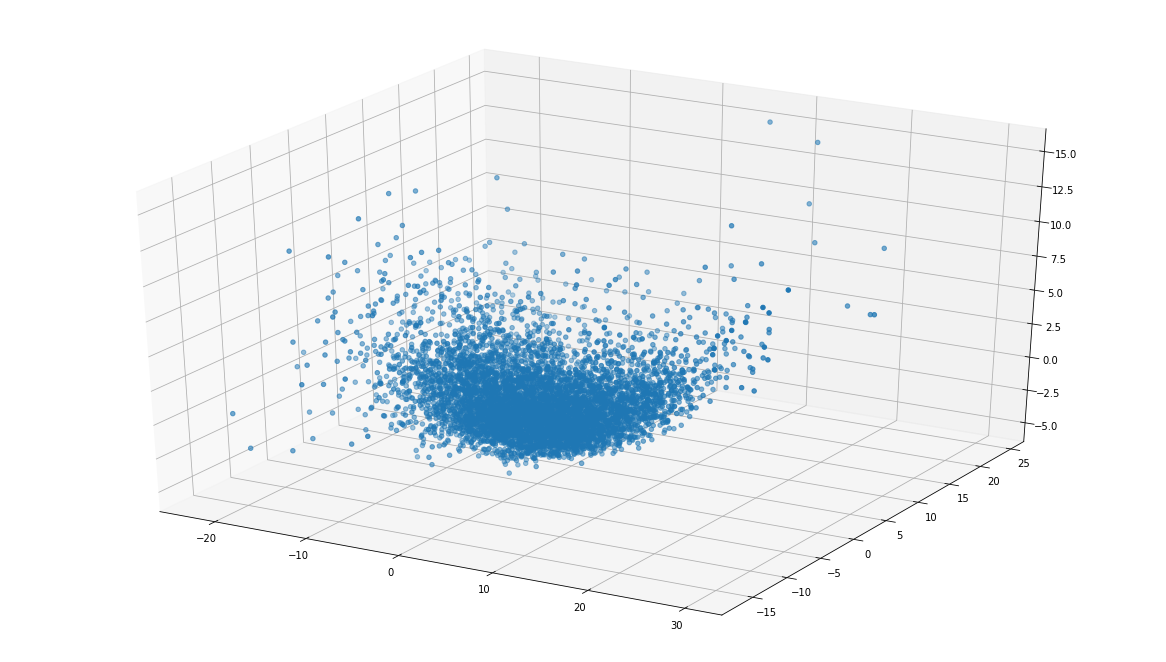

In [83]:
from mpl_toolkits.mplot3d import Axes3D

plt.rcParams['figure.figsize'] = (16, 9)
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(df_pca.iloc[:, 0], df_pca.iloc[:, 1], df_pca.iloc[:, 3]);

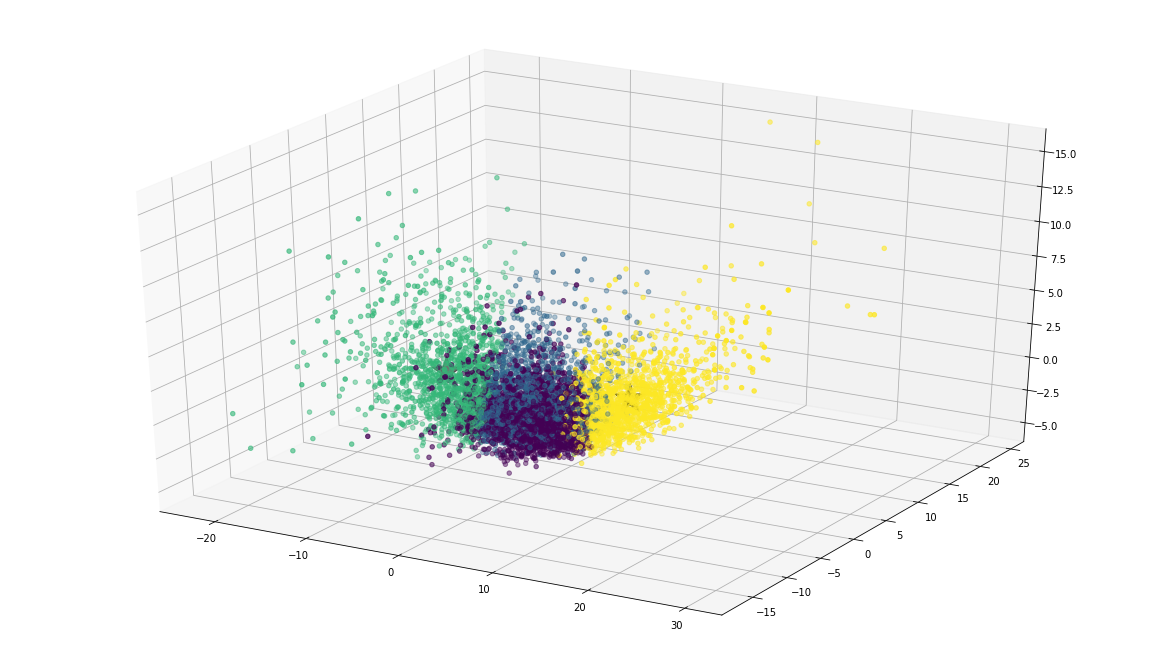

In [88]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(df_pca.iloc[:, 0], df_pca.iloc[:, 1], df_pca.iloc[:, 3], c=kumeler)
ax.scatter(merkezler[:, 0], merkezler[:, 1], merkezler[:, 3], 
           marker='*', 
           c='#050505', 
           s=1000);

In [94]:
df_pca_last=pd.DataFrame({"ID" : df_pca.index, "Kumeler": kumeler})

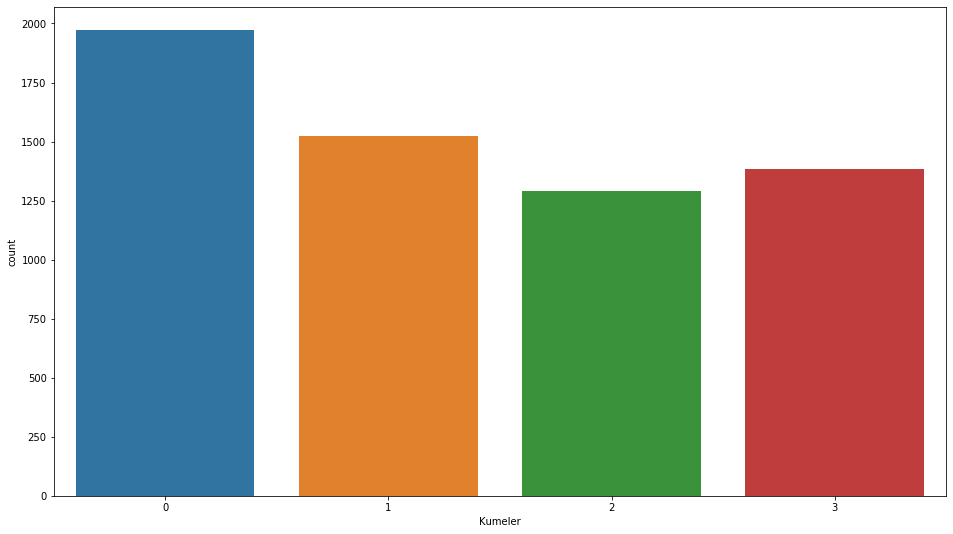

In [102]:
sns.countplot(df_pca_last["Kumeler"]);